In [1]:
import sys
%matplotlib notebook

sys.path.append('./utils/')
import numpy as np
import cv2
import gdal
import json
import glob, os
import loadcoraldata_utils as coralutils

import NeMO_layers
from NeMO_losses import charbonnierLoss
from keras.models import Model, Sequential, load_model

from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow.python.client import device_lib
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

%matplotlib notebook

model = load_model('./tmp/RefineMask_Jarrett256_RGB_NIR3.h5', custom_objects={'BilinearUpSampling2D':NeMO_layers.BilinearUpSampling2D, 'charbonnierLoss': charbonnierLoss})

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


<IPython.core.display.Javascript object>


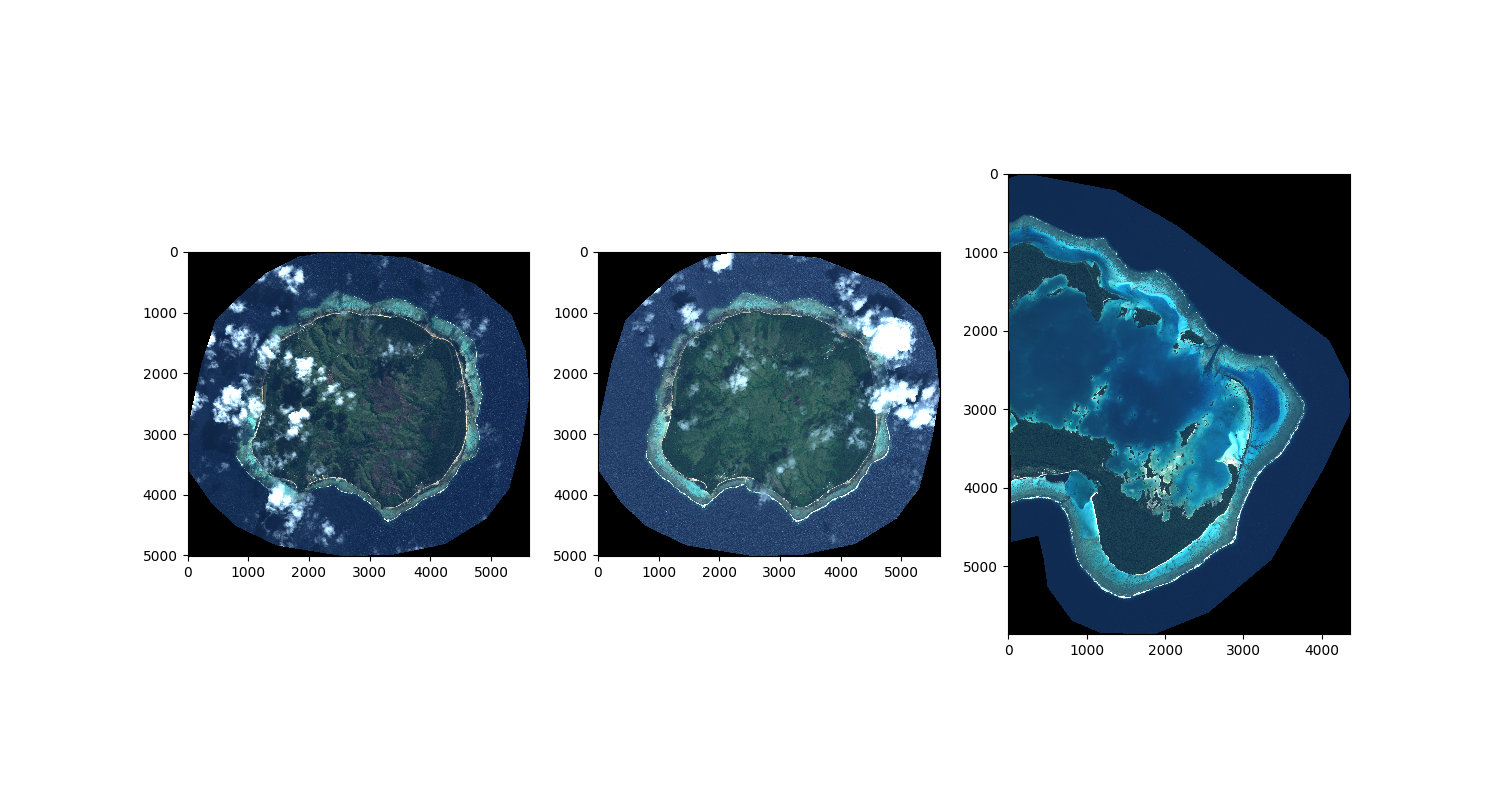

In [10]:
Cicia1 = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_001.TIF'
Cicia2 = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_002.TIF'
Cicia3 = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_003.TIF'
Fulaga1 = '/home/shared/NeMO-Net Data/processed_Fiji_files/mosaiced_004.TIF'
Cicia_original = '/home/shared/NeMO-Net Data/KSLOF-CICIA-FIJI/Cicia_Satellite_image_mosaic_KSLOF.tif'
Cicia_truthpath = '/home/shared/NeMO-Net Data/KSLOF-CICIA-FIJI/Cicia_Habitat_classes_raster_KSLOF.tif'
Fulaga_original = '/home/shared/NeMO-Net Data/KSLOF-FULAGA_Fiji/Fulaga_Satellite_image_mosaic_KSLOF.tif'
Fulaga_truthpath = '/home/shared/NeMO-Net Data/KSLOF-FULAGA_Fiji/Fulaga_Habitat_classes_raster_KSLOF.tif'
submission_realpath = '/home/asli/NeMO-Test/NeMO-NET/Images/Jarrett_submissions/Patches/'
submission_truthpath = '/home/asli/NeMO-Test/NeMO-NET/Images/Jarrett_submissions/Truthmaps_Gray/'
patchimg = 'Coral_00000002'

jsonpath = './utils/CoralClasses.json'

with open(jsonpath) as json_file:
    json_data = json.load(json_file)

Cicia1 = coralutils.CoralData(Cicia1, Truthpath=Cicia_truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
Cicia2 = coralutils.CoralData(Cicia2, Truthpath=Cicia_truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
Cicia3 = coralutils.CoralData(Cicia3, Truthpath=Cicia_truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")
Fulaga1 = coralutils.CoralData(Fulaga1, Truthpath=Fulaga_truthpath, truth_key=json_data["Fiji_ClassDict"], load_type="raster")

patchtruth = cv2.imread(submission_truthpath+patchimg+'.png')
patch = coralutils.CoralData(submission_realpath+patchimg+'.tif', load_type="raster")

xstart_orig = 3100
# xstart = 700
xlen = 512
ystart_orig = 600
# ystart = 3100
ylen = 512

offset = 128
xstart_orig = xstart_orig+offset
ystart_orig = ystart_orig+offset

fig = plt.figure(1, figsize=(15,8))
ax = plt.subplot(131)
Cicia1_RGB = 255/200*np.rollaxis(np.asarray([Cicia1.image[:,:,4], Cicia1.image[:,:,2], Cicia1.image[:,:,1]]),0,3)
Cicia1_RGB[Cicia1_RGB > 255] = 255
Cicia1_RGB = np.asarray(Cicia1_RGB, dtype=np.uint8)
ax.imshow(Cicia1_RGB)
ax = plt.subplot(132)
Cicia2_RGB = 255/200*np.rollaxis(np.asarray([Cicia2.image[:,:,4], Cicia2.image[:,:,2], Cicia2.image[:,:,1]]),0,3)
Cicia2_RGB[Cicia2_RGB > 255] = 255
Cicia2_RGB = np.asarray(Cicia2_RGB, dtype=np.uint8)
ax.imshow(Cicia2_RGB)
ax = plt.subplot(133)
# Cicia3_RGB = 255/200*np.rollaxis(np.asarray([Cicia3.image[:,:,4], Cicia3.image[:,:,2], Cicia3.image[:,:,1]]),0,3)
# Cicia3_RGB[Cicia3_RGB > 255] = 255
# Cicia3_RGB = np.asarray(Cicia3_RGB, dtype=np.uint8)
# ax.imshow(Cicia3_RGB)
Fulaga1_RGB = 255/200*np.rollaxis(np.asarray([Fulaga1.image[:,:,4], Fulaga1.image[:,:,2], Fulaga1.image[:,:,1]]),0,3)
Fulaga1_RGB[Fulaga1_RGB > 255] = 255
Fulaga1_RGB = np.asarray(Fulaga1_RGB, dtype=np.uint8)
ax.imshow(Fulaga1_RGB)

fig = plt.figure(2,figsize=(18,6))
Testimage1 = Cicia1.image[ystart_orig:ystart_orig+ylen,xstart_orig:xstart_orig+xlen,:]
Testimage1_RGB = 255/200*np.rollaxis(np.asarray([Testimage1[:,:,4], Testimage1[:,:,2], Testimage1[:,:,1]]),0,3)
Testimage1_RGB[Testimage1_RGB > 255] = 255
Testimage1_RGB = np.asarray(Testimage1_RGB, dtype=np.uint8)
ax = plt.subplot(131)
ax.imshow(Testimage1_RGB)

Testimage2 = Cicia2.image[ystart_orig:ystart_orig+ylen,xstart_orig:xstart_orig+xlen,:]
Testimage2_RGB = 255/200*np.rollaxis(np.asarray([Testimage2[:,:,4], Testimage2[:,:,2], Testimage2[:,:,1]]),0,3)
Testimage2_RGB[Testimage2_RGB > 255] = 255
Testimage2_RGB = np.asarray(Testimage2_RGB, dtype=np.uint8)
ax = plt.subplot(132)
ax.imshow(Testimage2_RGB)

# Testimage3 = Fulaga1.image[ystart:ystart+ylen,xstart:xstart+xlen,:]
# Testimage3_RGB = 255/200*np.rollaxis(np.asarray([Testimage3[:,:,4], Testimage3[:,:,2], Testimage3[:,:,1]]),0,3)
# Testimage3_RGB[Testimage3_RGB > 255] = 255
# Testimage3_RGB[Testimage3_RGB < 0] = 0
# Testimage3_RGB = np.asarray(Testimage3_RGB, dtype=np.uint8)
# ax = plt.subplot(133)
# ax.imshow(Testimage3_RGB)

Testimage3 = Cicia3.image[ystart_orig:ystart_orig+ylen,xstart_orig:xstart_orig+xlen,:]
Testimage3_RGB = 255/200*np.rollaxis(np.asarray([Testimage3[:,:,4], Testimage3[:,:,2], Testimage3[:,:,1]]),0,3)
Testimage3_RGB[Testimage3_RGB > 255] = 255
Testimage3_RGB[Testimage3_RGB < 0] = 0
Testimage3_RGB = np.asarray(Testimage3_RGB, dtype=np.uint8)
ax = plt.subplot(133)
ax.imshow(Testimage3_RGB)

# fig = plt.figure(3,figsize=(15,8))
# patch_RGB = 100*np.rollaxis(np.asarray([patch.image[:,:,4], patch.image[:,:,2], patch.image[:,:,1]]),0,3)+100
# patch_RGB[patch_RGB > 255] = 255
# patch_RGB[patch_RGB < 0] = 0
# patch_RGB = np.asarray(patch_RGB, dtype=np.uint8)
# ax = plt.subplot(121)
# ax.imshow(patchtruth)
# ax = plt.subplot(122)
# ax.imshow(patch_RGB)


# hsv = cv2.cvtColor(Testimage1_RGB, cv2.COLOR_RGB2HSV)
# edges1 = cv2.Canny(Cicia1_RGB,150,175)
# edges3 = cv2.Canny(Cicia3_RGB,150,175)
# fig = plt.figure(3,figsize=(30,15))
# ax = plt.subplot(121)
# ax.imshow(edges1)
# ax = plt.subplot(122)
# ax.imshow(edges3)

# fig = plt.figure(3,figsize=(18,6))
# Testimage_random = Testimage1+20
# Testimage_random = 255/200*np.rollaxis(np.asarray([Testimage_random[:,:,4], Testimage_random[:,:,2], Testimage_random[:,:,1]]),0,3)
# Testimage_random[Testimage_random > 255] = 255
# Testimage_random = np.asarray(Testimage_random, dtype=np.uint8)
# ax = plt.subplot(111)
# ax.imshow(Testimage_random)


<IPython.core.display.Javascript object>


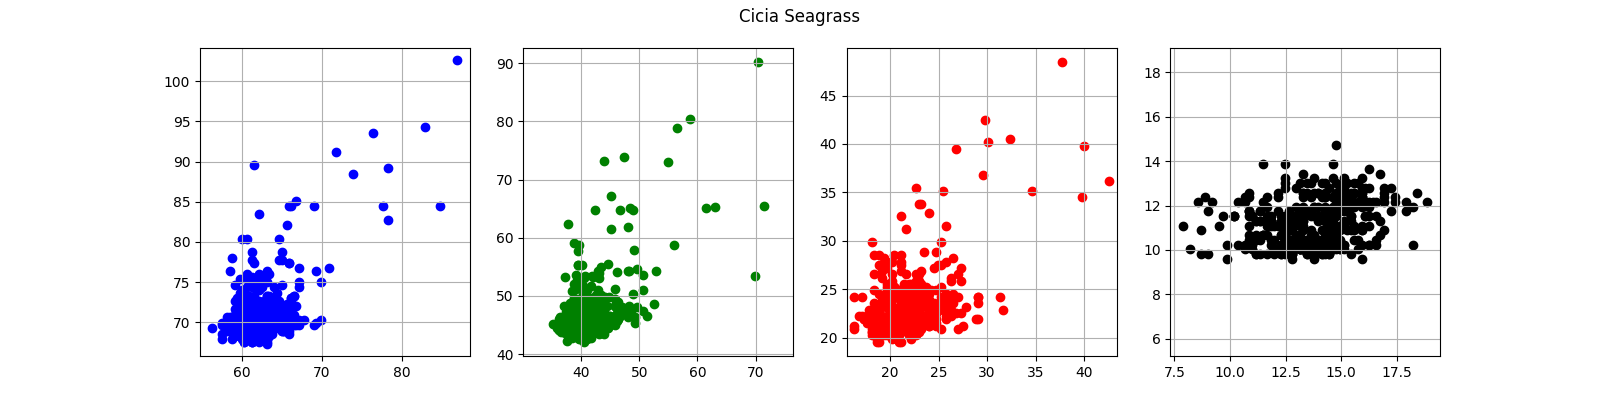

<IPython.core.display.Javascript object>


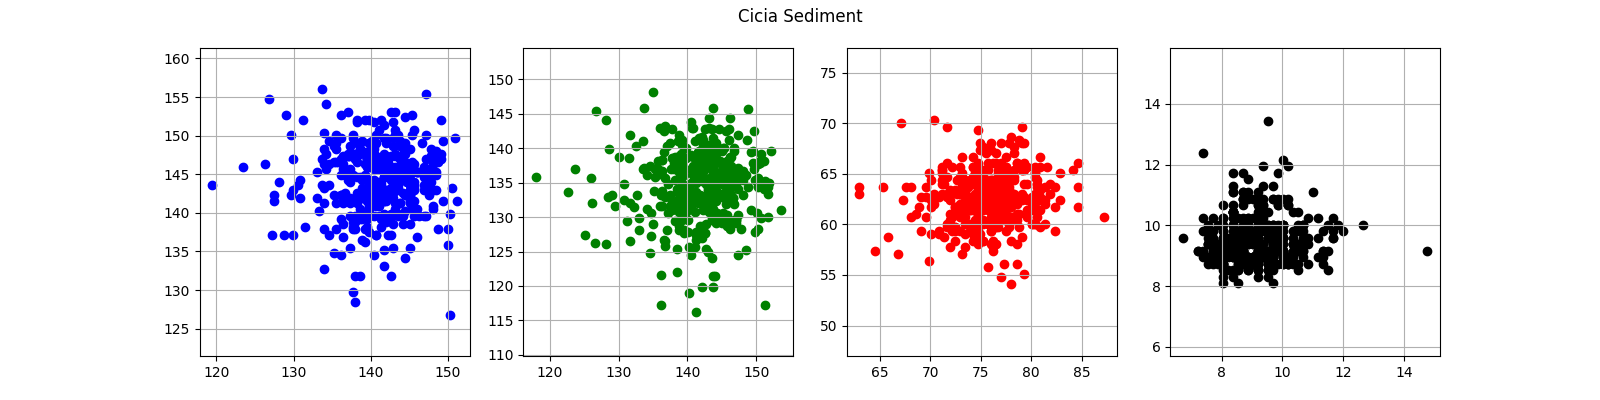

<IPython.core.display.Javascript object>


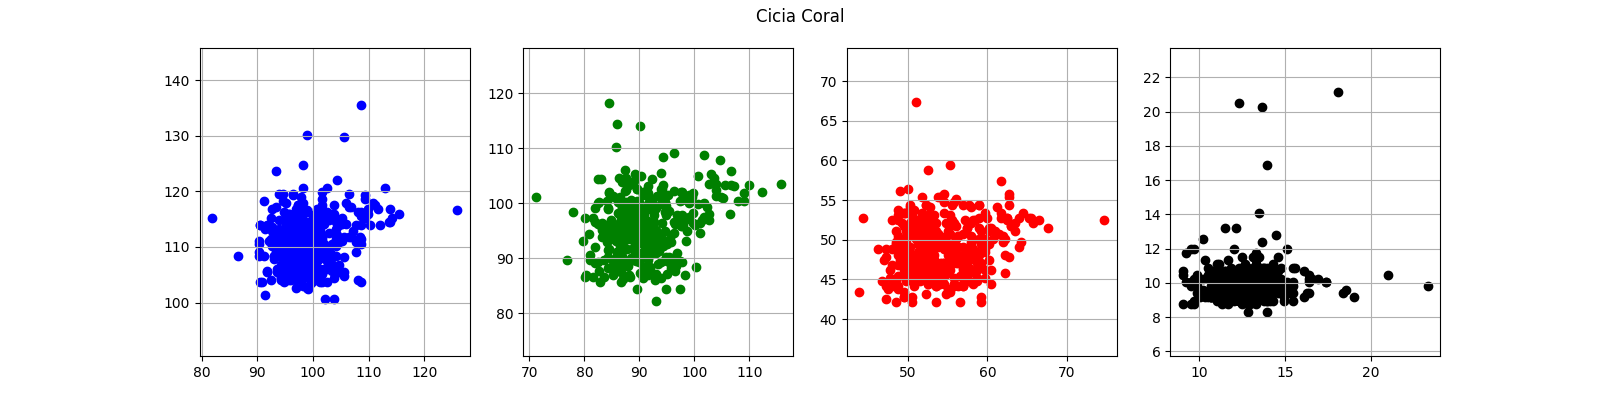

<IPython.core.display.Javascript object>


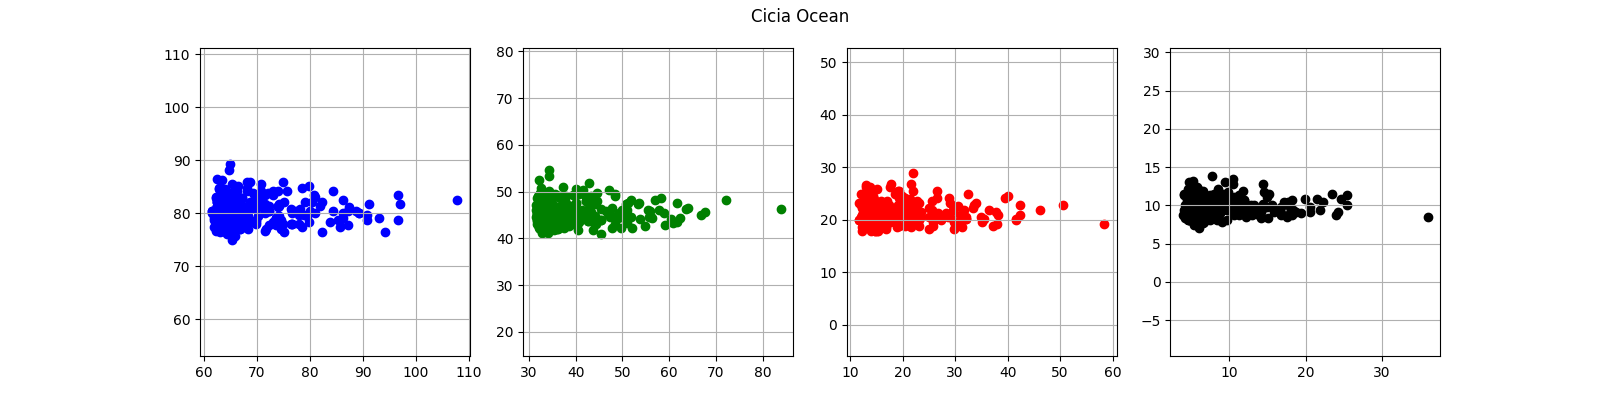

In [17]:
sg_ystart_orig = 295
sg_xstart_orig = 55
sg_ylen = 20
sg_xlen = 20

sed_ystart_orig = 132
sed_xstart_orig = 220
sed_ylen = 20
sed_xlen = 20

veg_ystart_orig = 390
veg_xstart_orig = 250
veg_ylen = 20
veg_xlen = 20

ocn_ystart_orig = 10
ocn_xstart_orig = 470
ocn_ylen = 20
ocn_xlen = 20

coral_ystart_orig = 80
coral_xstart_orig = 185
coral_ylen = 20
coral_xlen = 20

sg_ystart_new = 3880
sg_xstart_new = 590
sed_ystart_new = 4930
sed_xstart_new = 2220
coral_ystart_new = 5200
coral_xstart_new = 1210
ocn_ystart_new = 5410
ocn_xstart_new = 1020

sample_sg_pts_orig = Cicia1.image[ystart_orig+sg_ystart_orig:ystart_orig+sg_ystart_orig+sg_ylen, xstart_orig+sg_xstart_orig:xstart_orig+sg_xstart_orig+sg_xlen, :]
# sample_sg_pts2 = Fulaga1.image[sg_ystart_new:sg_ystart_new+sg_ylen, sg_xstart_new:sg_xstart_new+sg_xlen, :]
sample_sg_pts2 = Cicia2.image[ystart_orig+sg_ystart_orig:ystart_orig+sg_ystart_orig+sg_ylen, xstart_orig+sg_xstart_orig:xstart_orig+sg_xstart_orig+sg_xlen, :]
# sample_sg_pts3 = Cicia3.image[ystart+sg_ystart:ystart+sg_ystart+sg_ylen,xstart+sg_xstart:xstart+sg_xstart+sg_xlen,:]
sample_sed_pts_orig = Cicia1.image[ystart_orig+sed_ystart_orig:ystart_orig+sed_ystart_orig+sed_ylen, xstart_orig+sed_xstart_orig:xstart_orig+sed_xstart_orig+sed_xlen, :]
# sample_sed_pts2 = Fulaga1.image[sed_ystart_new:sed_ystart_new+sed_ylen, sed_xstart_new:sed_xstart_new+sed_xlen, :]
sample_sed_pts2 = Cicia2.image[ystart_orig+sed_ystart_orig:ystart_orig+sed_ystart_orig+sed_ylen, xstart_orig+sed_xstart_orig:xstart_orig+sed_xstart_orig+sed_xlen, :]
# sample_sed_pts3 = Cicia3.image[ystart+sed_ystart:ystart+sed_ystart+sed_ylen,xstart+sed_xstart:xstart+sed_xstart+sed_xlen,:]
sample_veg_pts_orig = Cicia1.image[ystart_orig+veg_ystart_orig:ystart_orig+veg_ystart_orig+veg_ylen, xstart_orig+veg_xstart_orig:xstart_orig+veg_xstart_orig+veg_xlen, :]
# sample_veg_pts2 = Cicia2.image[ystart+veg_ystart:ystart+veg_ystart+veg_ylen,xstart+veg_xstart:xstart+veg_xstart+veg_xlen,:]
# sample_veg_pts3 = Cicia3.image[ystart+veg_ystart:ystart+veg_ystart+veg_ylen,xstart+veg_xstart:xstart+veg_xstart+veg_xlen,:]
sample_ocn_pts_orig = Cicia1.image[ystart_orig+ocn_ystart_orig:ystart_orig+ocn_ystart_orig+ocn_ylen, xstart_orig+ocn_xstart_orig:xstart_orig+ocn_xstart_orig+ocn_xlen, :]
# sample_ocn_pts2 = Fulaga1.image[ocn_ystart_new:ocn_ystart_new+ocn_ylen, ocn_xstart_new:ocn_xstart_new+ocn_xlen, :]
sample_ocn_pts2 = Cicia2.image[ystart_orig+ocn_ystart_orig:ystart_orig+ocn_ystart_orig+ocn_ylen, xstart_orig+ocn_xstart_orig:xstart_orig+ocn_xstart_orig+ocn_xlen, :]
# sample_ocn_pts3 = Cicia3.image[ystart+ocn_ystart:ystart+ocn_ystart+ocn_ylen,xstart+ocn_xstart:xstart+ocn_xstart+ocn_xlen,:]
sample_coral_pts_orig = Cicia1.image[ystart_orig+coral_ystart_orig:ystart_orig+coral_ystart_orig+coral_ylen, xstart_orig+coral_xstart_orig:xstart_orig+coral_xstart_orig+coral_xlen, :]
# sample_coral_pts2 = Fulaga1.image[coral_ystart_new:coral_ystart_new+coral_ylen, coral_xstart_new:coral_xstart_new+coral_xlen, :]
sample_coral_pts2 = Cicia2.image[ystart_orig+coral_ystart_orig:ystart_orig+coral_ystart_orig+coral_ylen, xstart_orig+coral_xstart_orig:xstart_orig+coral_xstart_orig+coral_xlen, :]
# sample_coral_pts3 = Cicia3.image[ystart+coral_ystart:ystart+coral_ystart+coral_ylen,xstart+coral_xstart:xstart+coral_xstart+coral_xlen,:]

fig,ax = plt.subplots(1,4)
fig.suptitle('Cicia Seagrass')
fig.set_figheight(4)
fig.set_figwidth(16)
ax[0].scatter(sample_sg_pts_orig[:,:,1].flatten(), sample_sg_pts2[:,:,1].flatten(),c='b',marker='o')
# ax[0].scatter(sample_sg_pts1[:,:,1].flatten(), sample_sg_pts3[:,:,1].flatten(),c='b',marker='x')
ax[0].axis('equal')
ax[0].grid()
ax[1].scatter(sample_sg_pts_orig[:,:,2].flatten(), sample_sg_pts2[:,:,2].flatten(),c='g',marker='o')
# ax[1].scatter(sample_sg_pts1[:,:,2].flatten(), sample_sg_pts3[:,:,2].flatten(),c='g',marker='x')
ax[1].axis('equal')
ax[1].grid()
ax[2].scatter(sample_sg_pts_orig[:,:,4].flatten(), sample_sg_pts2[:,:,4].flatten(),c='r',marker='o')
# ax[2].scatter(sample_sg_pts1[:,:,4].flatten(), sample_sg_pts3[:,:,4].flatten(),c='r',marker='x')
ax[2].axis('equal')
ax[2].grid()
ax[3].scatter(sample_sg_pts_orig[:,:,6].flatten(), sample_sg_pts2[:,:,6].flatten(),c='k',marker='o')
# ax[3].scatter(sample_sg_pts1[:,:,6].flatten(), sample_sg_pts3[:,:,6].flatten(),c='k',marker='x')
ax[3].axis('equal')
ax[3].grid()
plt.show()

fig,ax = plt.subplots(1,4)
fig.suptitle('Cicia Sediment')
fig.set_figheight(4)
fig.set_figwidth(16)
ax[0].scatter(sample_sed_pts_orig[:,:,1].flatten(), sample_sed_pts2[:,:,1].flatten(),c='b',marker='o')
# ax[0].scatter(sample_sed_pts1[:,:,1].flatten(), sample_sed_pts3[:,:,1].flatten(),c='b',marker='x')
ax[0].axis('equal')
ax[0].grid()
ax[1].scatter(sample_sed_pts_orig[:,:,2].flatten(), sample_sed_pts2[:,:,2].flatten(),c='g',marker='o')
# ax[1].scatter(sample_sed_pts1[:,:,2].flatten(), sample_sed_pts3[:,:,2].flatten(),c='g',marker='x')
ax[1].axis('equal')
ax[1].grid()
ax[2].scatter(sample_sed_pts_orig[:,:,4].flatten(), sample_sed_pts2[:,:,4].flatten(),c='r',marker='o')
# ax[2].scatter(sample_sed_pts1[:,:,4].flatten(), sample_sed_pts3[:,:,4].flatten(),c='r',marker='x')
ax[2].axis('equal')
ax[2].grid()
ax[3].scatter(sample_sed_pts_orig[:,:,6].flatten(), sample_sed_pts2[:,:,6].flatten(),c='k',marker='o')
# ax[3].scatter(sample_sed_pts1[:,:,6].flatten(), sample_sed_pts3[:,:,6].flatten(),c='k',marker='x')
ax[3].axis('equal')
ax[3].grid()
plt.show()

fig,ax = plt.subplots(1,4)
fig.suptitle('Cicia Coral')
fig.set_figheight(4)
fig.set_figwidth(16)
ax[0].scatter(sample_coral_pts_orig[:,:,1].flatten(), sample_coral_pts2[:,:,1].flatten(),c='b',marker='o')
# ax[0].scatter(sample_coral_pts1[:,:,1].flatten(), sample_coral_pts3[:,:,1].flatten(),c='b',marker='x')
ax[0].axis('equal')
ax[0].grid()
ax[1].scatter(sample_coral_pts_orig[:,:,2].flatten(), sample_coral_pts2[:,:,2].flatten(),c='g',marker='o')
# ax[1].scatter(sample_coral_pts1[:,:,2].flatten(), sample_coral_pts3[:,:,2].flatten(),c='g',marker='x')
ax[1].axis('equal')
ax[1].grid()
ax[2].scatter(sample_coral_pts_orig[:,:,4].flatten(), sample_coral_pts2[:,:,4].flatten(),c='r',marker='o')
# ax[2].scatter(sample_coral_pts1[:,:,4].flatten(), sample_coral_pts3[:,:,4].flatten(),c='r',marker='x')
ax[2].axis('equal')
ax[2].grid()
ax[3].scatter(sample_coral_pts_orig[:,:,6].flatten(), sample_coral_pts2[:,:,6].flatten(),c='k',marker='o')
# ax[3].scatter(sample_coral_pts1[:,:,6].flatten(), sample_coral_pts3[:,:,6].flatten(),c='k',marker='x')
ax[3].axis('equal')
ax[3].grid()
plt.show()

# fig,ax = plt.subplots(1,4)
# fig.suptitle('Cicia Vegetation')
# fig.set_figheight(4)
# fig.set_figwidth(16)
# ax[0].scatter(sample_veg_pts1[:,:,1].flatten(), sample_veg_pts2[:,:,1].flatten(),c='b',marker='o')
# ax[0].scatter(sample_veg_pts1[:,:,1].flatten(), sample_veg_pts3[:,:,1].flatten(),c='b',marker='x')
# ax[0].axis('equal')
# ax[0].grid()
# ax[1].scatter(sample_veg_pts1[:,:,2].flatten(), sample_veg_pts2[:,:,2].flatten(),c='g',marker='o')
# ax[1].scatter(sample_veg_pts1[:,:,2].flatten(), sample_veg_pts3[:,:,2].flatten(),c='g',marker='x')
# ax[1].axis('equal')
# ax[1].grid()
# ax[2].scatter(sample_veg_pts1[:,:,4].flatten(), sample_veg_pts2[:,:,4].flatten(),c='r',marker='o')
# ax[2].scatter(sample_veg_pts1[:,:,4].flatten(), sample_veg_pts3[:,:,4].flatten(),c='r',marker='x')
# ax[2].axis('equal')
# ax[2].grid()
# ax[3].scatter(sample_veg_pts1[:,:,6].flatten(), sample_veg_pts2[:,:,6].flatten(),c='k',marker='o')
# ax[3].scatter(sample_veg_pts1[:,:,6].flatten(), sample_veg_pts3[:,:,6].flatten(),c='k',marker='x')
# ax[3].axis('equal')
# ax[3].grid()
# plt.show()

fig,ax = plt.subplots(1,4)
fig.suptitle('Cicia Ocean')
fig.set_figheight(4)
fig.set_figwidth(16)
ax[0].scatter(sample_ocn_pts_orig[:,:,1].flatten(), sample_ocn_pts2[:,:,1].flatten(),c='b',marker='o')
# ax[0].scatter(sample_ocn_pts1[:,:,1].flatten(), sample_ocn_pts3[:,:,1].flatten(),c='b',marker='x')
ax[0].axis('equal')
ax[0].grid()
ax[1].scatter(sample_ocn_pts_orig[:,:,2].flatten(), sample_ocn_pts2[:,:,2].flatten(),c='g',marker='o')
# ax[1].scatter(sample_ocn_pts1[:,:,2].flatten(), sample_ocn_pts3[:,:,2].flatten(),c='g',marker='x')
ax[1].axis('equal')
ax[1].grid()
ax[2].scatter(sample_ocn_pts_orig[:,:,4].flatten(), sample_ocn_pts2[:,:,4].flatten(),c='r',marker='o')
# ax[2].scatter(sample_ocn_pts1[:,:,4].flatten(), sample_ocn_pts3[:,:,4].flatten(),c='r',marker='x')
ax[2].axis('equal')
ax[2].grid()
ax[3].scatter(sample_ocn_pts_orig[:,:,6].flatten(), sample_ocn_pts2[:,:,6].flatten(),c='k',marker='o')
# ax[3].scatter(sample_ocn_pts1[:,:,6].flatten(), sample_ocn_pts3[:,:,6].flatten(),c='k',marker='x')
ax[3].axis('equal')
ax[3].grid()
plt.show()
                                  

<IPython.core.display.Javascript object>


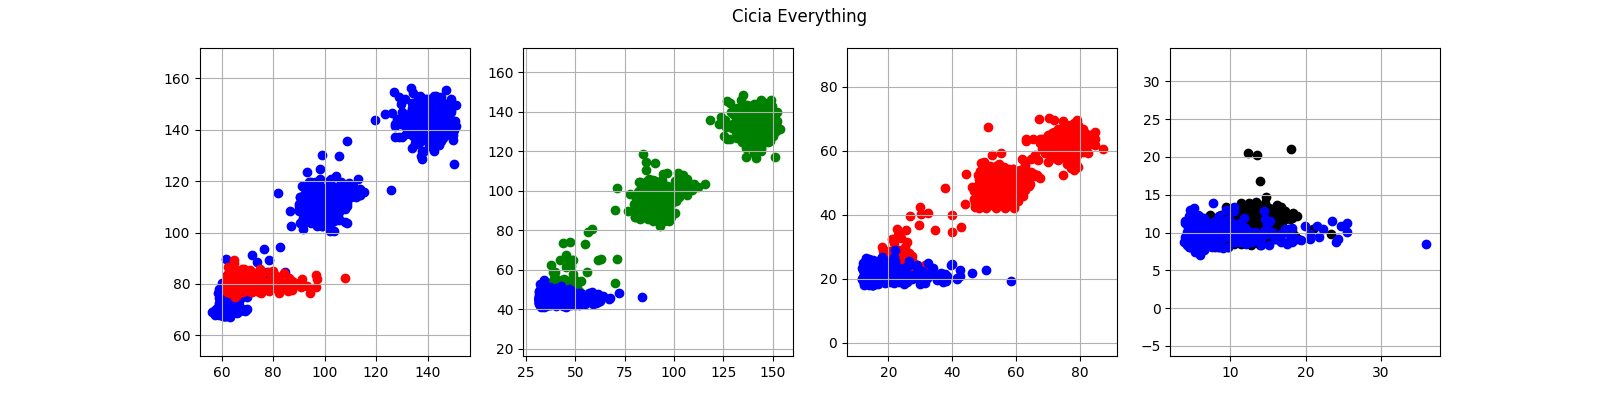

<IPython.core.display.Javascript object>


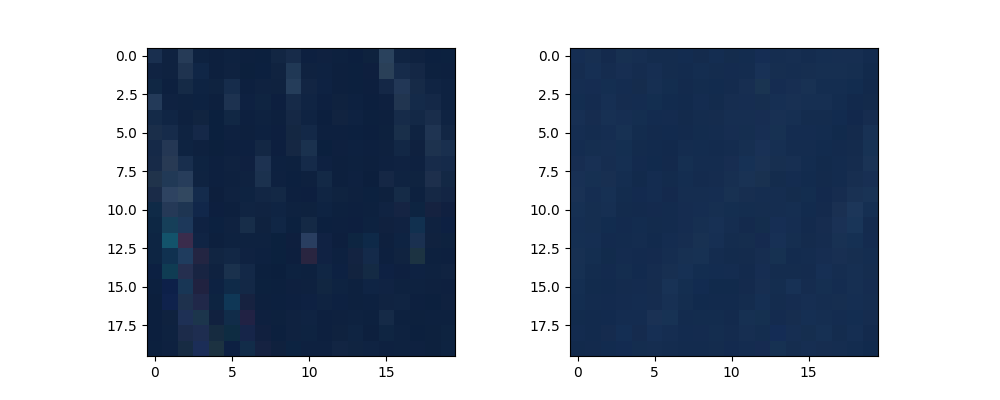

In [18]:
fig,ax = plt.subplots(1,4)
fig.suptitle('Cicia Everything')
fig.set_figheight(4)
fig.set_figwidth(16)
ax[0].scatter(sample_sg_pts_orig[:,:,1].flatten(), sample_sg_pts2[:,:,1].flatten(),c='b',marker='o')
# ax[0].scatter(sample_sg_pts1[:,:,1].flatten(), sample_sg_pts3[:,:,1].flatten(),c='b',marker='x')
ax[0].scatter(sample_sed_pts_orig[:,:,1].flatten(), sample_sed_pts2[:,:,1].flatten(),c='b',marker='o')
# ax[0].scatter(sample_sed_pts1[:,:,1].flatten(), sample_sed_pts3[:,:,1].flatten(),c='b',marker='x')
ax[0].scatter(sample_coral_pts_orig[:,:,1].flatten(), sample_coral_pts2[:,:,1].flatten(),c='b',marker='o')
# ax[0].scatter(sample_coral_pts1[:,:,1].flatten(), sample_coral_pts3[:,:,1].flatten(),c='b',marker='x')
ax[0].scatter(sample_ocn_pts_orig[:,:,1].flatten(), sample_ocn_pts2[:,:,1].flatten(),c='r',marker='o')
# ax[0].scatter(sample_ocn_pts1[:,:,1].flatten(), sample_ocn_pts3[:,:,1].flatten(),c='r',marker='x')
# ax[0].scatter(sample_veg_pts1[:,:,1].flatten(), sample_veg_pts2[:,:,1].flatten(),c='b',marker='o')
# ax[0].scatter(sample_veg_pts1[:,:,1].flatten(), sample_veg_pts3[:,:,1].flatten(),c='b',marker='x')
ax[0].axis('equal')
ax[0].grid()

ax[1].scatter(sample_sg_pts_orig[:,:,2].flatten(), sample_sg_pts2[:,:,2].flatten(),c='g',marker='o')
# ax[1].scatter(sample_sg_pts1[:,:,2].flatten(), sample_sg_pts3[:,:,2].flatten(),c='g',marker='x')
ax[1].scatter(sample_sed_pts_orig[:,:,2].flatten(), sample_sed_pts2[:,:,2].flatten(),c='g',marker='o')
# ax[1].scatter(sample_sed_pts1[:,:,2].flatten(), sample_sed_pts3[:,:,2].flatten(),c='g',marker='x')
ax[1].scatter(sample_coral_pts_orig[:,:,2].flatten(), sample_coral_pts2[:,:,2].flatten(),c='g',marker='o')
# ax[1].scatter(sample_coral_pts1[:,:,2].flatten(), sample_coral_pts3[:,:,2].flatten(),c='g',marker='x')
ax[1].scatter(sample_ocn_pts_orig[:,:,2].flatten(), sample_ocn_pts2[:,:,2].flatten(),c='b',marker='o')
# ax[1].scatter(sample_ocn_pts1[:,:,2].flatten(), sample_ocn_pts3[:,:,2].flatten(),c='b',marker='x')
# ax[1].scatter(sample_veg_pts1[:,:,2].flatten(), sample_veg_pts2[:,:,2].flatten(),c='g',marker='o')
# ax[1].scatter(sample_veg_pts1[:,:,2].flatten(), sample_veg_pts3[:,:,2].flatten(),c='g',marker='x')
ax[1].axis('equal')
ax[1].grid()

ax[2].scatter(sample_sg_pts_orig[:,:,4].flatten(), sample_sg_pts2[:,:,4].flatten(),c='r',marker='o')
# ax[2].scatter(sample_sg_pts1[:,:,4].flatten(), sample_sg_pts3[:,:,4].flatten(),c='r',marker='x')
ax[2].scatter(sample_sed_pts_orig[:,:,4].flatten(), sample_sed_pts2[:,:,4].flatten(),c='r',marker='o')
# ax[2].scatter(sample_sed_pts1[:,:,4].flatten(), sample_sed_pts3[:,:,4].flatten(),c='r',marker='x')
ax[2].scatter(sample_coral_pts_orig[:,:,4].flatten(), sample_coral_pts2[:,:,4].flatten(),c='r',marker='o')
# ax[2].scatter(sample_coral_pts1[:,:,4].flatten(), sample_coral_pts3[:,:,4].flatten(),c='r',marker='x')
ax[2].scatter(sample_ocn_pts_orig[:,:,4].flatten(), sample_ocn_pts2[:,:,4].flatten(),c='b',marker='o')
# ax[2].scatter(sample_ocn_pts1[:,:,4].flatten(), sample_ocn_pts3[:,:,4].flatten(),c='b',marker='x')
# ax[2].scatter(sample_veg_pts1[:,:,4].flatten(), sample_veg_pts2[:,:,4].flatten(),c='r',marker='o')
# ax[2].scatter(sample_veg_pts1[:,:,4].flatten(), sample_veg_pts3[:,:,4].flatten(),c='r',marker='x')
ax[2].axis('equal')
ax[2].grid()
ax[3].scatter(sample_sg_pts_orig[:,:,6].flatten(), sample_sg_pts2[:,:,6].flatten(),c='k',marker='o')
# ax[3].scatter(sample_sg_pts1[:,:,6].flatten(), sample_sg_pts3[:,:,6].flatten(),c='k',marker='x')
ax[3].scatter(sample_sed_pts_orig[:,:,6].flatten(), sample_sed_pts2[:,:,6].flatten(),c='k',marker='o')
# ax[3].scatter(sample_sed_pts1[:,:,6].flatten(), sample_sed_pts3[:,:,6].flatten(),c='k',marker='x')
ax[3].scatter(sample_coral_pts_orig[:,:,6].flatten(), sample_coral_pts2[:,:,6].flatten(),c='k',marker='o')
# ax[3].scatter(sample_coral_pts1[:,:,6].flatten(), sample_coral_pts3[:,:,6].flatten(),c='k',marker='x')
ax[3].scatter(sample_ocn_pts_orig[:,:,6].flatten(), sample_ocn_pts2[:,:,6].flatten(),c='b',marker='o')
# ax[3].scatter(sample_ocn_pts1[:,:,6].flatten(), sample_ocn_pts3[:,:,6].flatten(),c='b',marker='x')
# ax[3].scatter(sample_veg_pts1[:,:,6].flatten(), sample_veg_pts2[:,:,6].flatten(),c='k',marker='o')
# ax[3].scatter(sample_veg_pts1[:,:,6].flatten(), sample_veg_pts3[:,:,6].flatten(),c='k',marker='x')
ax[3].axis('equal')
ax[3].grid()
plt.show()

fig,ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)
testpoints = np.rollaxis(np.asarray([sample_ocn_pts_orig[:,:,4], sample_ocn_pts_orig[:,:,2], sample_ocn_pts_orig[:,:,1]]),0,3)
testpoints = np.asarray(testpoints, dtype=np.uint8)
ax[0].imshow(testpoints)
testpoints = np.rollaxis(np.asarray([sample_ocn_pts2[:,:,4], sample_ocn_pts2[:,:,2], sample_ocn_pts2[:,:,1]]),0,3)
testpoints = np.asarray(testpoints, dtype=np.uint8)
ax[1].imshow(testpoints)

In [19]:
from scipy.optimize import curve_fit

def func(X, k1, k2, k3, k4, k5, k6, k7, k8, k9):
    b, g, r, n = X
    a = k1*b**2 + k2*b + k3*r**2 + k4*r + k5*g**2 + k6*g + k7*n**2 + k8*n + k9
    return a

def func_noNIR(X, k1, k2, k3, k4, k5, k6, k7):
    b, g, r= X
    a = k1*b**2 + k2*b + k3*r**2 + k4*r + k5*g**2 + k6*g + k7
    return a

def func_simple(x, k1, k2, k3):
    a = k1*x**2 + k2*x + k3
    return a

# b = np.asarray([sample_sg_pts1[:,:,1].flatten(), sample_sed_pts1[:,:,1].flatten(), sample_coral_pts1[:,:,1].flatten(), sample_veg_pts1[:,:,1].flatten(), sample_ocn_pts1[:,:,1].flatten()]).flatten()
# g = np.asarray([sample_sg_pts1[:,:,2].flatten(), sample_sed_pts1[:,:,2].flatten(), sample_coral_pts1[:,:,2].flatten(), sample_veg_pts1[:,:,2].flatten(), sample_ocn_pts1[:,:,2].flatten()]).flatten()
# r = np.asarray([sample_sg_pts1[:,:,4].flatten(), sample_sed_pts1[:,:,4].flatten(), sample_coral_pts1[:,:,4].flatten(), sample_veg_pts1[:,:,4].flatten(), sample_ocn_pts1[:,:,4].flatten()]).flatten()
# n = np.asarray([sample_sg_pts1[:,:,6].flatten(), sample_sed_pts1[:,:,6].flatten(), sample_coral_pts1[:,:,6].flatten(), sample_veg_pts1[:,:,6].flatten(), sample_ocn_pts1[:,:,6].flatten()]).flatten()

# B = np.asarray([sample_sg_pts2[:,:,1].flatten(), sample_sed_pts2[:,:,1].flatten(), sample_coral_pts2[:,:,1].flatten(), sample_veg_pts2[:,:,1].flatten(), sample_ocn_pts2[:,:,1].flatten()]).flatten()
# G = np.asarray([sample_sg_pts2[:,:,2].flatten(), sample_sed_pts2[:,:,2].flatten(), sample_coral_pts2[:,:,2].flatten(), sample_veg_pts2[:,:,2].flatten(), sample_ocn_pts2[:,:,2].flatten()]).flatten()
# R = np.asarray([sample_sg_pts2[:,:,4].flatten(), sample_sed_pts2[:,:,4].flatten(), sample_coral_pts2[:,:,4].flatten(), sample_veg_pts2[:,:,4].flatten(), sample_ocn_pts2[:,:,4].flatten()]).flatten()
# N = np.asarray([sample_sg_pts2[:,:,6].flatten(), sample_sed_pts2[:,:,6].flatten(), sample_coral_pts2[:,:,6].flatten(), sample_veg_pts2[:,:,6].flatten(), sample_ocn_pts2[:,:,6].flatten()]).flatten()

b = np.asarray([sample_sg_pts_orig[:,:,1].flatten(), sample_sed_pts_orig[:,:,1].flatten(), sample_coral_pts_orig[:,:,1].flatten()]).flatten()
g = np.asarray([sample_sg_pts_orig[:,:,2].flatten(), sample_sed_pts_orig[:,:,2].flatten(), sample_coral_pts_orig[:,:,2].flatten()]).flatten()
r = np.asarray([sample_sg_pts_orig[:,:,4].flatten(), sample_sed_pts_orig[:,:,4].flatten(), sample_coral_pts_orig[:,:,4].flatten()]).flatten()
n = np.asarray([sample_sg_pts_orig[:,:,6].flatten(), sample_sed_pts_orig[:,:,6].flatten(), sample_coral_pts_orig[:,:,6].flatten()]).flatten()

B = np.asarray([sample_sg_pts2[:,:,1].flatten(), sample_sed_pts2[:,:,1].flatten(), sample_coral_pts2[:,:,1].flatten()]).flatten()
G = np.asarray([sample_sg_pts2[:,:,2].flatten(), sample_sed_pts2[:,:,2].flatten(), sample_coral_pts2[:,:,2].flatten()]).flatten()
R = np.asarray([sample_sg_pts2[:,:,4].flatten(), sample_sed_pts2[:,:,4].flatten(), sample_coral_pts2[:,:,4].flatten()]).flatten()
N = np.asarray([sample_sg_pts2[:,:,6].flatten(), sample_sed_pts2[:,:,6].flatten(), sample_coral_pts2[:,:,6].flatten()]).flatten()

# B = np.asarray([sample_sg_pts3[:,:,1].flatten(), sample_sed_pts3[:,:,1].flatten(), sample_coral_pts3[:,:,1].flatten(), sample_ocn_pts3[:,:,1].flatten()]).flatten()
# G = np.asarray([sample_sg_pts3[:,:,2].flatten(), sample_sed_pts3[:,:,2].flatten(), sample_coral_pts3[:,:,2].flatten(), sample_ocn_pts3[:,:,2].flatten()]).flatten()
# R = np.asarray([sample_sg_pts3[:,:,4].flatten(), sample_sed_pts3[:,:,4].flatten(), sample_coral_pts3[:,:,4].flatten(), sample_ocn_pts3[:,:,4].flatten()]).flatten()
# N = np.asarray([sample_sg_pts3[:,:,6].flatten(), sample_sed_pts3[:,:,6].flatten(), sample_coral_pts3[:,:,6].flatten(), sample_ocn_pts3[:,:,6].flatten()]).flatten()

k_guess = 1,1,1,1,1,1,1,1,1
k_guess_noNIR = 1,1,1,1,1,1,1
k_guess_simple = 1,1,1
# fitb = curve_fit(func, (B,G,R,N), b, k_guess)
# fitg = curve_fit(func, (B,G,R,N), g, k_guess)
# fitr = curve_fit(func, (B,G,R,N), r, k_guess)
# fitn = curve_fit(func, (B,G,R,N), g, k_guess)
fitb = curve_fit(func_noNIR, (B,G,R), b, k_guess_noNIR)
fitg = curve_fit(func_noNIR, (B,G,R), g, k_guess_noNIR)
fitr = curve_fit(func_noNIR, (B,G,R), r, k_guess_noNIR)
fitn = curve_fit(func_simple, N, n, k_guess_simple)
# fitb = curve_fit(func_simple, B, b, k_guess_simple)
# fitg = curve_fit(func_simple, G, g, k_guess_simple)
# fitr = curve_fit(func_simple, R, r, k_guess_simple)
print(fitb[0], fitg[0], fitr[0])
print(fitn[0])

[-9.70751445e-03  2.78372506e+00 -1.03462451e-02  7.40184997e-02
  9.83163999e-03 -1.11532877e+00 -5.16650583e+01] [-1.38511484e-02  3.85133001e+00 -1.36344268e-02  1.87768149e-01
  1.25206505e-02 -1.43144688e+00 -1.19198413e+02] [-8.49358306e-03  2.29397753e+00 -2.46605544e-03 -8.45509351e-02
  4.27921765e-03 -4.27033814e-01 -8.39540617e+01]
[-0.09171971  3.01111253 -9.20261062]


<IPython.core.display.Javascript object>


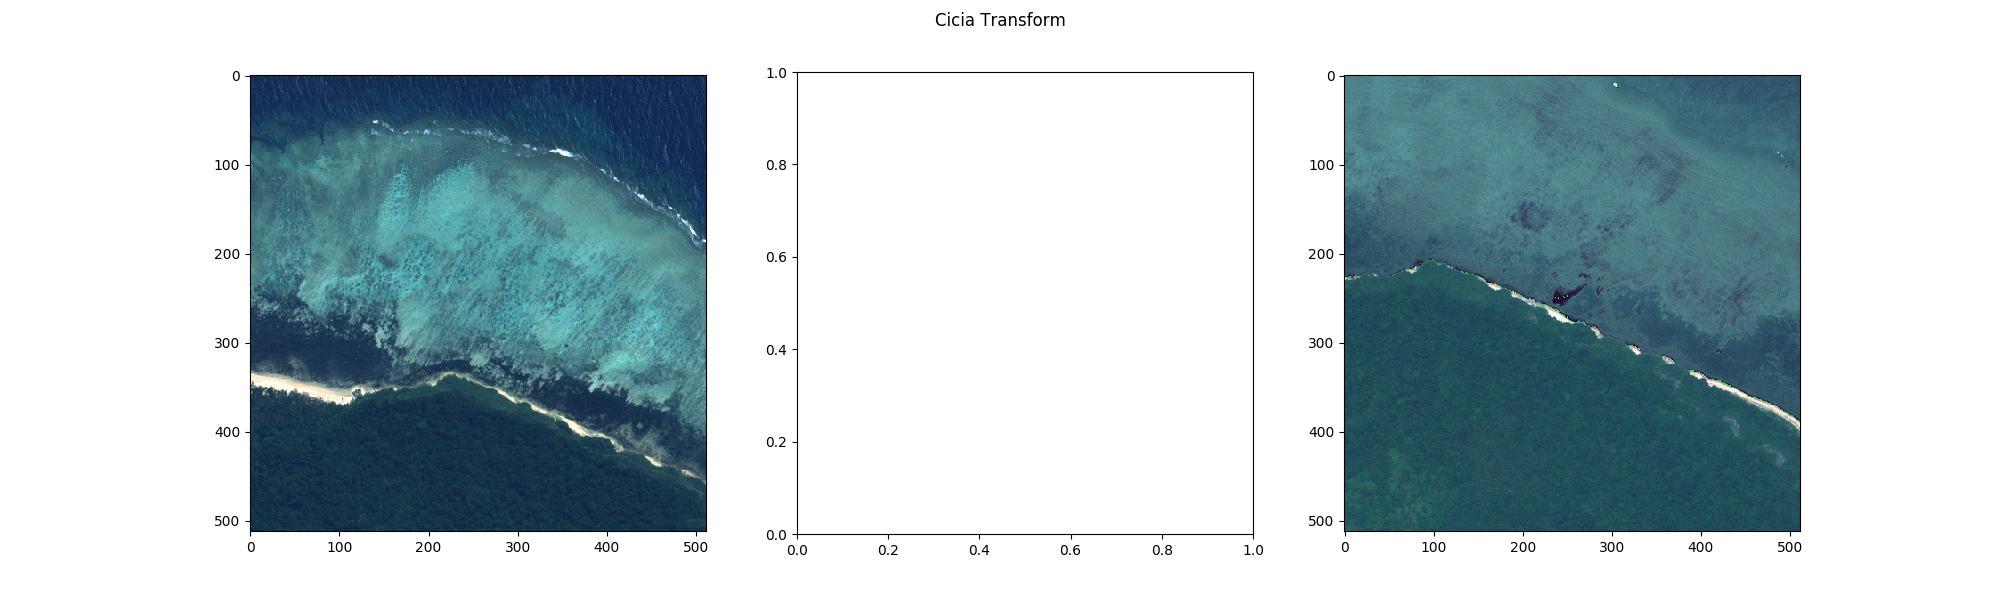

In [44]:
Testimage2 = Cicia3.image[ystart:ystart+ylen,xstart:xstart+xlen,:]

totalb = np.asarray(Testimage2[:,:,1].flatten())
totalg = np.asarray(Testimage2[:,:,2].flatten())
totalr = np.asarray(Testimage2[:,:,4].flatten())
totaln = np.asarray(Testimage2[:,:,6].flatten())
white_pixels = np.where(np.sqrt(totalb**2+totalg**2+totalr**2) >= 250)
NIR_pixels = np.where(totaln >= 50)

# totaln = np.asarray(Testimage2[:,:,6].flatten())

# newB = func((totalb,totalg,totalr,totaln), fitb[0][0], fitb[0][1], fitb[0][2], fitb[0][3], fitb[0][4], fitb[0][5], fitb[0][6], fitb[0][7], fitb[0][8])
# newG = func((totalb,totalg,totalr,totaln), fitg[0][0], fitg[0][1], fitg[0][2], fitg[0][3], fitg[0][4], fitg[0][5], fitg[0][6], fitg[0][7], fitg[0][8])
# newR = func((totalb,totalg,totalr,totaln), fitr[0][0], fitr[0][1], fitr[0][2], fitr[0][3], fitr[0][4], fitr[0][5], fitr[0][6], fitr[0][7], fitr[0][8])
# newN = func((totalb,totalg,totalr,totaln), fitn[0][0], fitn[0][1], fitn[0][2], fitn[0][3], fitn[0][4], fitn[0][5], fitn[0][6], fitn[0][7], fitn[0][8])
newB = func_noNIR((totalb,totalg,totalr), fitb[0][0], fitb[0][1], fitb[0][2], fitb[0][3], fitb[0][4], fitb[0][5], fitb[0][6]) 
newG = func_noNIR((totalb,totalg,totalr), fitg[0][0], fitg[0][1], fitg[0][2], fitg[0][3], fitg[0][4], fitg[0][5], fitg[0][6])
newR = func_noNIR((totalb,totalg,totalr), fitr[0][0], fitr[0][1], fitr[0][2], fitr[0][3], fitr[0][4], fitr[0][5], fitr[0][6])
# newB = func_simple(totalb, fitb[0][0], fitb[0][1], fitb[0][2])
# newG = func_simple(totalg, fitg[0][0], fitg[0][1], fitg[0][2])
# newR = func_simple(totalr, fitr[0][0], fitr[0][1], fitr[0][2])

newB[NIR_pixels[0]] = totalb[NIR_pixels[0]]
newG[NIR_pixels[0]] = totalg[NIR_pixels[0]]
newR[NIR_pixels[0]] = totalr[NIR_pixels[0]]
# newN[NIR_pixels[0]] = totaln[NIR_pixels[0]]
newB[white_pixels[0]] = totalb[white_pixels[0]]
newG[white_pixels[0]] = totalg[white_pixels[0]]
newR[white_pixels[0]] = totalr[white_pixels[0]]
# newN[white_pixels[0]] = totaln[white_pixels[0]]

newB = newB.reshape((ylen,xlen)) + (np.random.rand(ylen,xlen)-0.5)*10
newG = newG.reshape((ylen,xlen)) + (np.random.rand(ylen,xlen)-0.5)*10
newR = newR.reshape((ylen,xlen)) + (np.random.rand(ylen,xlen)-0.5)*10
# newN = newN.reshape((ylen,xlen))

remappedCicia = 255/200*np.rollaxis(np.asarray([newR,newG,newB]),0,3)
remappedCicia[remappedCicia > 255] = 255
remappedCicia = np.asarray(remappedCicia, dtype=np.uint8)

fig,ax = plt.subplots(1,3)
fig.suptitle('Cicia Transform')
fig.set_figheight(6)
fig.set_figwidth(20)
ax[0].imshow(Testimage1_RGB)
# ax[1].imshow(Testimage3_RGB)
ax[2].imshow(remappedCicia)

plt.show()

[-4.15778176e-03  9.92238524e-01  3.11413450e-03 -9.86207243e-01
 -1.77025397e-03  1.29841736e+00 -5.14556412e+00] [-5.29431958e-03  1.18963981e+00  2.56063858e-03 -9.89613586e-01
 -1.57069939e-03  1.46111890e+00 -4.36487044e+01] [-1.48100318e-03  3.97380417e-01  2.64893802e-03 -4.97457172e-01
 -2.95161719e-03  9.82702764e-01 -2.15628175e+01] [1.17250241e-03 1.84723914e-01 7.89848717e+00]
[ 28  56 170 198 226]
[0 1 5 6 7]


<IPython.core.display.Javascript object>


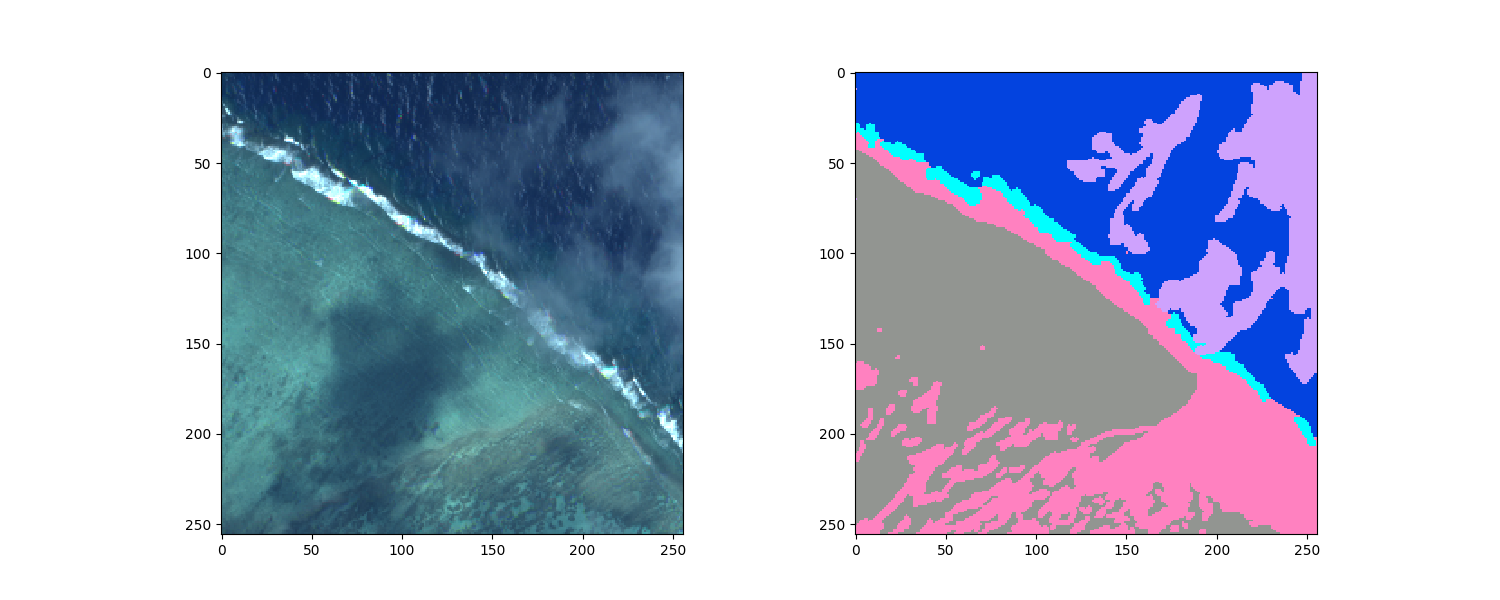

<IPython.core.display.Javascript object>


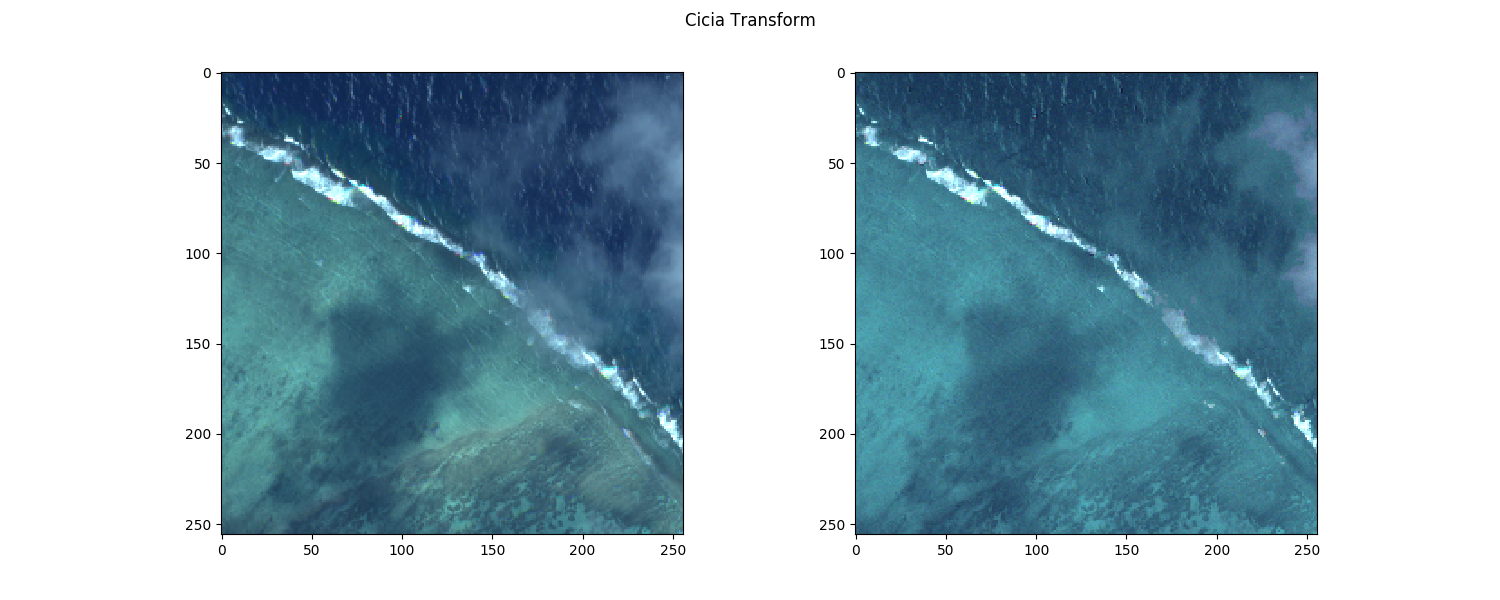

In [54]:
# cmap stuff
cmap_Ved = colors.ListedColormap(['xkcd:pink', 'xkcd:grey', 'xkcd:tan', 'xkcd:olive', 'xkcd:forest', 'xkcd:blue',
                                'xkcd:lilac', 'xkcd:cyan', 'xkcd:orange'])
bounds = [i+0.5 for i in range(10)]
norm = colors.BoundaryNorm([b+0.5 for b in bounds], cmap_Ved.N)
jsonpath = './utils/CoralClasses.json'
with open(jsonpath) as json_file:
    json_data = json.load(json_file)
labelkey = json_data["VedConsolidated_ClassDict"]
class_indices_rev = dict((v,k) for k,v in labelkey.items()) #flip k,v

# reverse fit
fitb_rev = curve_fit(func_noNIR, (b,g,r), B, k_guess_noNIR)
fitg_rev = curve_fit(func_noNIR, (b,g,r), G, k_guess_noNIR)
fitr_rev = curve_fit(func_noNIR, (b,g,r), R, k_guess_noNIR)
fitn_rev = curve_fit(func_simple, n, N, k_guess_simple)

print(fitb_rev[0], fitg_rev[0], fitr_rev[0], fitn_rev[0])

submission_realpath = '/home/asli/NeMO-Test/NeMO-NET/Images/Jarrett_submissions/Patches/'
submission_truthpath = '/home/asli/NeMO-Test/NeMO-NET/Images/Jarrett_submissions/Truthmaps_Gray/'
patchimg = 'Coral_00000003'
patchtruth = cv2.imread(submission_truthpath+patchimg+'.png')[:,:,0]
print(np.unique(patchtruth))
patchtruth = np.asarray(np.round(len(class_indices_rev)/255*patchtruth)-1, dtype='uint8')
print(np.unique(patchtruth))
patch = coralutils.CoralData(submission_realpath+patchimg+'.tif', load_type="raster")
patch_R = 255/200*(patch.image[:,:,4]*100+100)
patch_G = 255/200*(patch.image[:,:,2]*100+100)
patch_B = 255/200*(patch.image[:,:,1]*100+100)
patch_R[patch_R > 255] = 255
patch_G[patch_G > 255] = 255
patch_B[patch_B > 255] = 255
patch_RGB = np.rollaxis(np.asarray([patch_R, patch_G, patch_B], dtype=np.uint8),0,3)

fig,ax = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].imshow(patch_RGB)
ax[1].imshow(patchtruth.astype(int)+1, interpolation='nearest', cmap=cmap_Ved, norm=norm)
plt.show()

# testimage = Cicia1.image[ystart_orig:ystart_orig+ylen,xstart_orig:xstart_orig+xlen,:]
testimage = patch.image*100+100

# testimage = Cicia1.image[3400:3400+ylen,1000:1000+xlen,:]
totalb_rev = np.asarray(testimage[:,:,1].flatten())
totalg_rev = np.asarray(testimage[:,:,2].flatten())
totalr_rev = np.asarray(testimage[:,:,4].flatten())
totaln_rev = np.asarray(testimage[:,:,6].flatten())
white_pixels_rev = np.where(np.sqrt(totalb_rev**2+totalg_rev**2+totalr_rev**2) >= 250)
NIR_pixels_rev = np.where(totaln_rev >= 40)

newB_rev = func_noNIR((totalb_rev,totalg_rev,totalr_rev), fitb_rev[0][0], fitb_rev[0][1], fitb_rev[0][2], fitb_rev[0][3], fitb_rev[0][4], fitb_rev[0][5], fitb_rev[0][6]) 
newG_rev = func_noNIR((totalb_rev,totalg_rev,totalr_rev), fitg_rev[0][0], fitg_rev[0][1], fitg_rev[0][2], fitg_rev[0][3], fitg_rev[0][4], fitg_rev[0][5], fitg_rev[0][6])
newR_rev = func_noNIR((totalb_rev,totalg_rev,totalr_rev), fitr_rev[0][0], fitr_rev[0][1], fitr_rev[0][2], fitr_rev[0][3], fitr_rev[0][4], fitr_rev[0][5], fitr_rev[0][6])

newB_rev[NIR_pixels_rev[0]] = totalb_rev[NIR_pixels_rev[0]]
newG_rev[NIR_pixels_rev[0]] = totalg_rev[NIR_pixels_rev[0]]
newR_rev[NIR_pixels_rev[0]] = totalr_rev[NIR_pixels_rev[0]]
newB_rev[white_pixels_rev[0]] = totalb_rev[white_pixels_rev[0]]
newG_rev[white_pixels_rev[0]] = totalg_rev[white_pixels_rev[0]]
newR_rev[white_pixels_rev[0]] = totalr_rev[white_pixels_rev[0]]

newB_rev = newB_rev.reshape((testimage.shape[0],testimage.shape[1])) + (np.random.rand(testimage.shape[0],testimage.shape[1])-0.5)*10
newG_rev = newG_rev.reshape((testimage.shape[0],testimage.shape[1])) + (np.random.rand(testimage.shape[0],testimage.shape[1])-0.5)*10
newR_rev = newR_rev.reshape((testimage.shape[0],testimage.shape[1])) + (np.random.rand(testimage.shape[0],testimage.shape[1])-0.5)*10

remappedCicia_rev = 255/200*np.rollaxis(np.asarray([newR_rev,newG_rev,newB_rev]),0,3)
remappedCicia_rev[remappedCicia_rev > 255] = 255
remappedCicia_rev = np.asarray(remappedCicia_rev, dtype=np.uint8)

fig,ax = plt.subplots(1,2)
fig.suptitle('Cicia Transform')
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].imshow(patch_RGB)
# ax[1].imshow(Testimage3_RGB)
ax[1].imshow(remappedCicia_rev)

plt.show()

{1: 'Coral', 2: 'Sediment', 3: 'Beach', 4: 'Seagrass', 5: 'Terrestrial vegetation', 6: 'Deep water', 7: 'Clouds', 8: 'Wave breaking', 9: 'Other or Unknown'}
(512, 512, 4)
Line: 0 Col: 0/ 257 completed
Line: 0 Col: 128/ 257 completed
Line: 0 Col: 256/ 257 completed
Line: 128 Col: 0/ 257 completed
Line: 128 Col: 128/ 257 completed
Line: 128 Col: 256/ 257 completed
Line: 256 Col: 0/ 257 completed
Line: 256 Col: 128/ 257 completed
Line: 256 Col: 256/ 257 completed


<IPython.core.display.Javascript object>


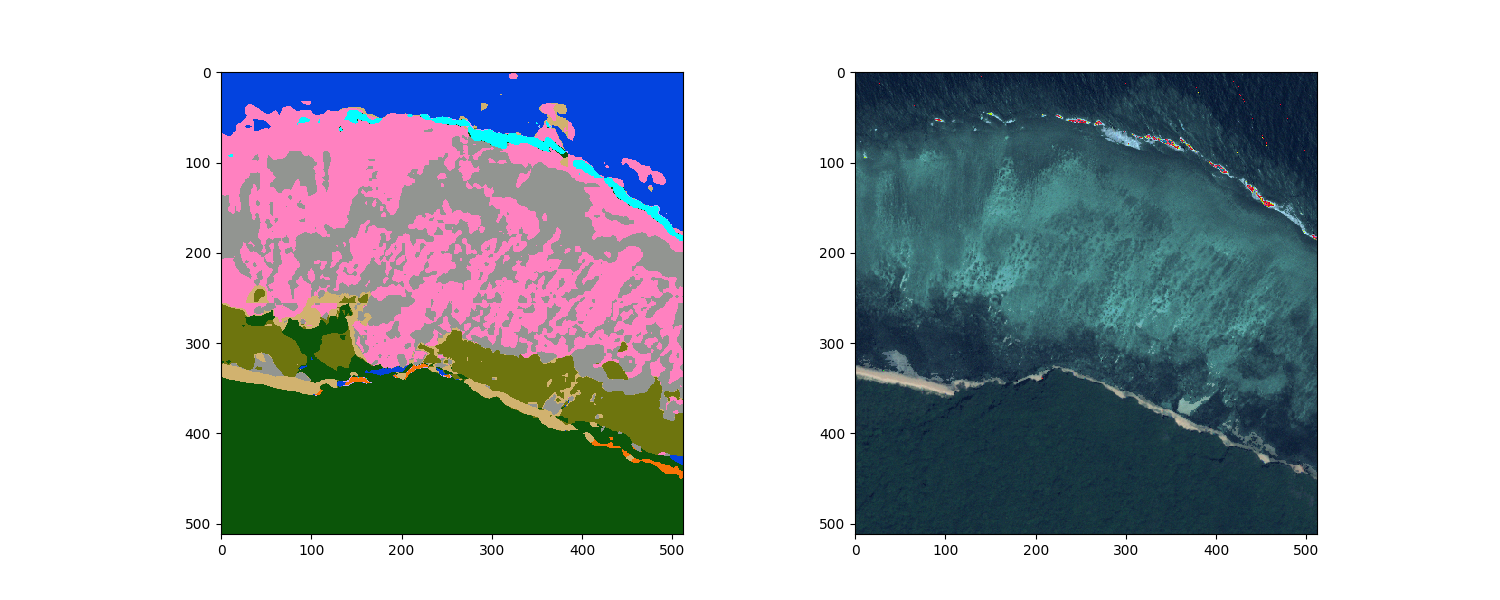

In [163]:
print(class_indices_rev)

testCicia = np.rollaxis(np.asarray([newB,newG,newR,Testimage2[:,:,6]]),0,3)
# testCicia = np.rollaxis(np.asarray([Testimage2[:,:,1],Testimage2[:,:,2],Testimage2[:,:,4],Testimage2[:,:,6]]),0,3)
# testCicia = np.rollaxis(np.asarray([newB,newG,newR,newN]),0,3)
print(testCicia.shape)

# Cicia1.testimage = testCicia[75:75+256,150:150+256,:]
Cicia1.testimage = testCicia
Cicia1.set_mean_std(100,100)
whole_predict, num_predict, prob_predict, truth_predict, accuracy = \
    Cicia1.predict_on_whole_image(model, image_size = 256, num_classes = len(class_indices_rev), spacing = (128,128), predict_size = 256, num_lines=None, lastchannelremove=False)

fig,ax = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)
ax[0].imshow(whole_predict.astype(int)+1, interpolation='nearest', cmap=cmap_Ved, norm=norm)
ax[1].imshow(np.asarray(testCicia[:,:,2::-1],dtype='uint8'))
plt.show()

<IPython.core.display.Javascript object>


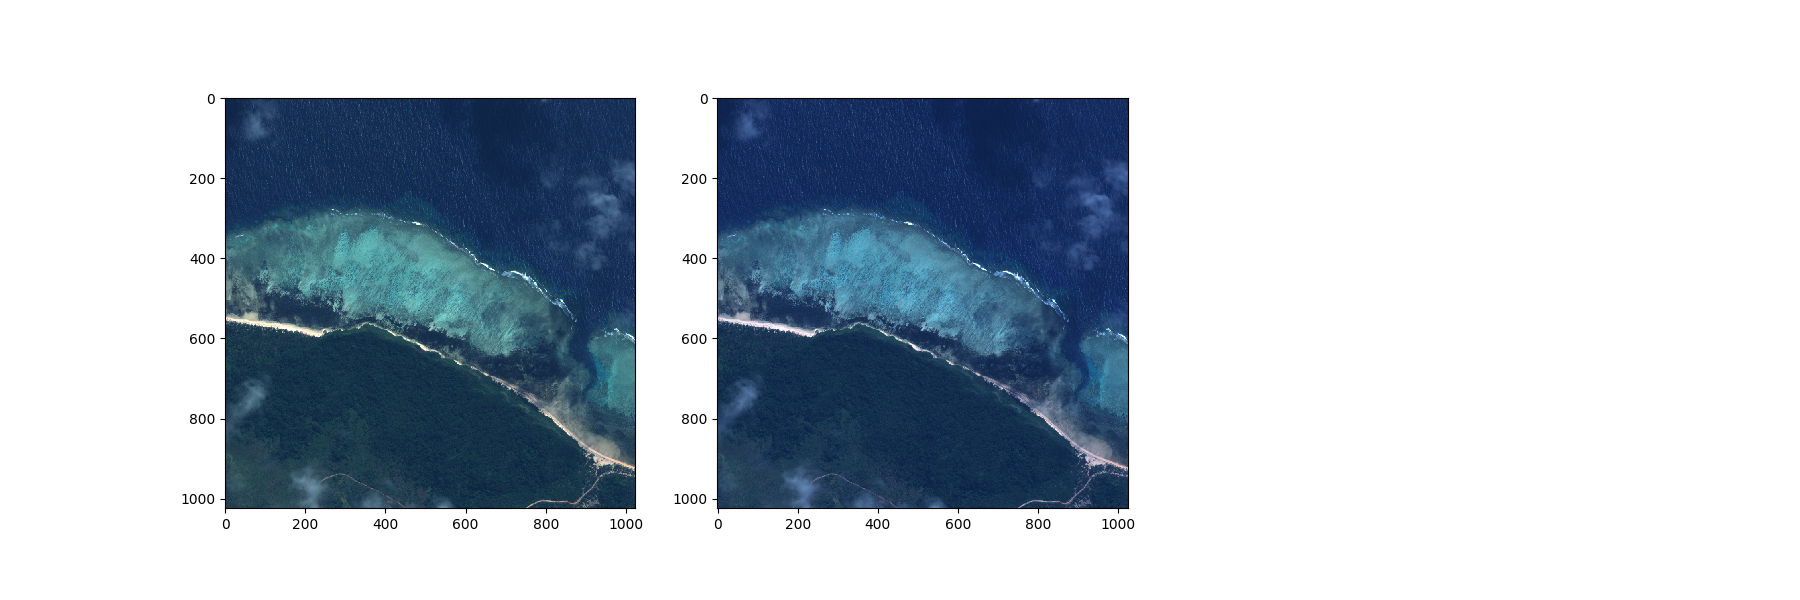

[111.81424713 129.02980042 128.20489502 102.92586517  70.37833405
  30.17964363   9.68708229   5.29773378]
[116.03966088 140.11775329 118.44316644 102.9331892   64.21498323
  30.09451894   9.4259115    4.79078089]


In [77]:
fig = plt.figure(6,figsize=(18,6))
Testimage1 = Cicia1.image[ystart:ystart+ylen,xstart:xstart+xlen,:]
Testimage1_RGB = 255/200*np.rollaxis(np.asarray([Testimage1[:,:,4], Testimage1[:,:,2], Testimage1[:,:,1]]),0,3)
Testimage1_RGB[Testimage1_RGB > 255] = 255
Testimage1_RGB = np.asarray(Testimage1_RGB, dtype=np.uint8)
ax = plt.subplot(131)
ax.imshow(Testimage1_RGB)

mod_testimage_RGB = 255/200*np.rollaxis(np.asarray([mod_testimage[:,:,4], mod_testimage[:,:,2], mod_testimage[:,:,1]]),0,3)
mod_testimage_RGB [mod_testimage_RGB  > 255] = 255
mod_testimage_RGB  = np.asarray(mod_testimage_RGB, dtype=np.uint8)
ax = plt.subplot(132)
ax.imshow(mod_testimage_RGB)

plt.show()

print(ori_testimage[360,360,:])
print(mod_testimage[360,360,:])

In [16]:
# img = coralutils.CoralData('./Generator_Outputs/_trainimg_0_0_5.tif', load_type="raster").image*100+100
# # img = coralutils.CoralData('../Images/Jarrett_Training_Patches/Coral/Coral_00000002.tif', load_type="raster").image*100+100
# # print(img)

# img_RGB = 255/200*np.rollaxis(np.asarray([img[:,:,2], img[:,:,1], img[:,:,0]]),0,3)
# img_RGB[img_RGB > 255] = 255
# img_RGB = np.asarray(img_RGB, dtype=np.uint8)

# fig = plt.figure(10,figsize=(10,10))
# ax = plt.subplot(131)
# ax.imshow(img_RGB)

patch = coralutils.CoralData(submission_realpath+patchimg, load_type="raster")
print(patch.image)


AttributeError: 'NoneType' object has no attribute 'RasterXSize'